In [4]:
import os
import yaml
import pickle

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
Models = {
    "MNIST": ["LeNet5", "LeNetPlusPlus", "MiniVGG"],
    "CIFAR10": ["ResNet50", "VGGNet", "AlexNet"],
}
Optimizers = [
    "SGD",
    "SGD_Momentum",
    "Adam",
    "NAdam",
    "AdaGrad",
    "AdaDelta",
    "AdaMax",
    "RMSProp",
]

In [6]:
os.chdir('result')

In [7]:
# Parse the training traces, accuracies and running times of the different models

accuracies = []
run_times = []
data = []
for dataset in list(Models.keys()):
    for model in Models[dataset]:
        training_traces = {}
        for optimizer in Optimizers:
            with open("{}_{}_{}.pkl".format(dataset, model, optimizer), "rb") as f:
                losses, accuracy, time_elapsed = pickle.load(f)
            accuracies.append(("{} {}".format(dataset, model), optimizer, accuracy))
            run_times.append(("{} {}".format(dataset, model), optimizer, time_elapsed))
            data.extend(
                [
                    ("{} {}".format(dataset, model), optimizer, epoch, loss)
                    for epoch, loss in enumerate(losses)
                ]
            )

In [8]:
# Convert to a dataframe 

df = pd.DataFrame(data, columns=["Model", "Optimization", "Epoch", "Loss"])
accuracy_df = pd.DataFrame(accuracies, columns=["Model", "Optimization", "Accuracy"])
time_df = pd.DataFrame(run_times, columns=["Model", "Optimization", "Unformatted_Time"])

In [9]:
# Convert the time is seconds to minutes.seconds
time_df["Time"] = pd.to_datetime(time_df["Unformatted_Time"], unit="s").dt.strftime(
    "%M.%S"
)

In [10]:
time_df.pivot_table(values="Time", index="Optimization", columns=["Model"])

Model,CIFAR10 AlexNet,CIFAR10 ResNet50,CIFAR10 VGGNet,MNIST LeNet5,MNIST LeNetPlusPlus,MNIST MiniVGG
Optimization,,,,,,
AdaDelta,27.34,29.15,30.47,5.01,6.02,6.29
AdaGrad,14.23,22.20,18.53,8.26,6.07,12.48
AdaMax,15.30,24.33,15.35,4.37,6.09,12.53
Adam,14.39,19.46,18.57,4.21,5.50,12.34
NAdam,14.47,20.15,19.31,4.22,6.10,12.41
RMSProp,14.55,19.17,14.54,4.23,6.13,12.35
SGD,13.59,18.33,18.41,5.02,5.35,12.27
SGD_Momentum,14.08,18.40,18.34,4.21,5.53,12.30


In [11]:
# Convert the accuracy between 0 and 1 to a percentage
accuracy_df["Accuracy"] = accuracy_df["Accuracy"].transform(lambda x: x * 100)

In [12]:
accuracy_df.pivot_table(values="Accuracy", index="Optimization", columns=["Model"])

Model,CIFAR10 AlexNet,CIFAR10 ResNet50,CIFAR10 VGGNet,MNIST LeNet5,MNIST LeNetPlusPlus,MNIST MiniVGG
Optimization,,,,,,
AdaDelta,13.40,35.03,10.12,86.00,83.96,94.04
AdaGrad,75.62,48.83,69.24,95.22,98.22,98.63
AdaMax,80.40,70.67,82.21,99.16,98.96,99.24
Adam,76.25,74.40,10.00,98.78,99.08,99.41
NAdam,76.91,75.04,10.00,99.22,99.00,99.37
RMSProp,64.00,74.63,10.00,98.97,99.29,99.17
SGD,68.17,66.87,10.20,98.35,98.81,98.97
SGD_Momentum,81.28,70.72,9.98,98.80,99.18,99.28


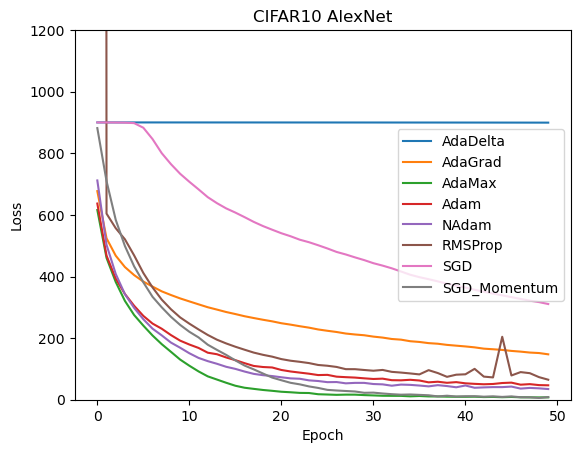

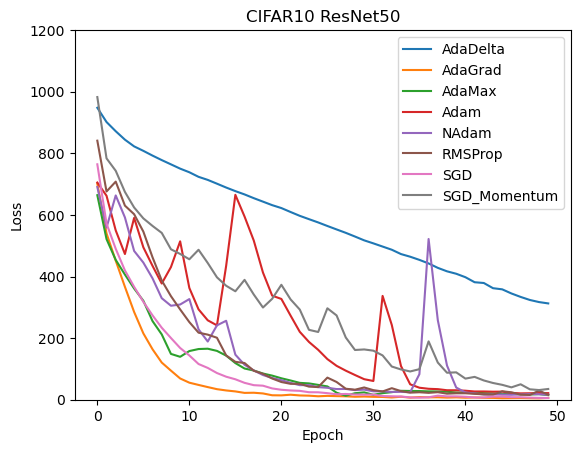

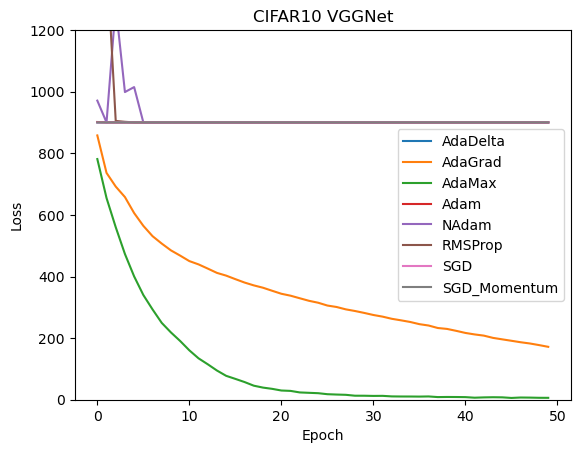

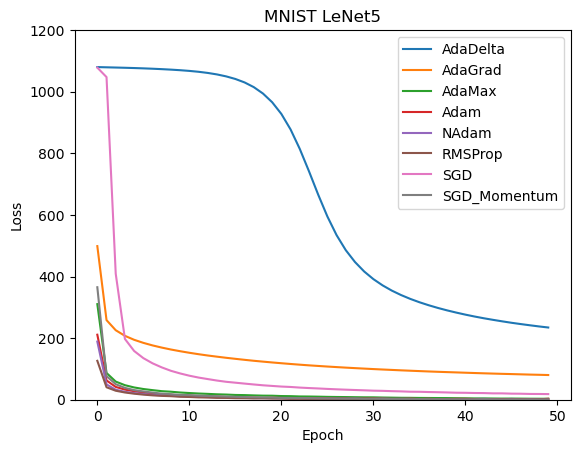

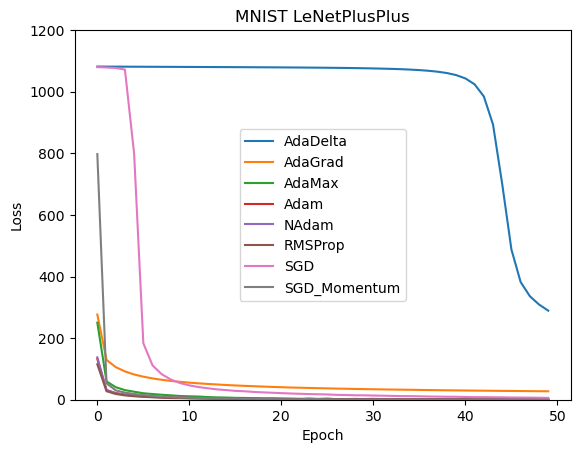

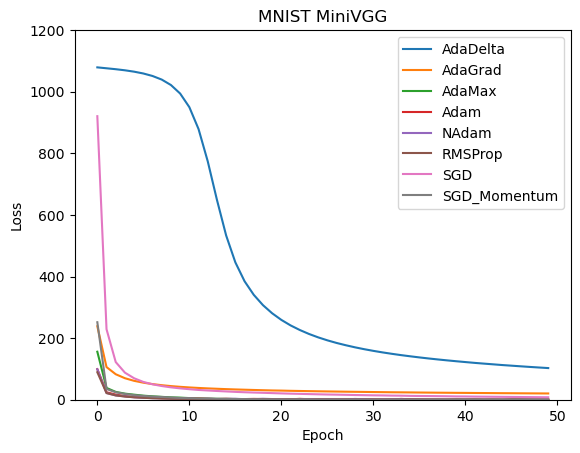

In [13]:
multi_index_df = df.pivot_table(
    values="Loss", index="Epoch", columns=["Model", "Optimization"]
)

# Plot losses per epoch for every optimization, making a plot for every model
for model in multi_index_df.columns.levels[0]:
    model_df = multi_index_df[model]
    ax = model_df.plot(legend=True)
    ax.set_ylim([0, 1200])
    ax.legend(loc="best")
    # plt.yscale('log')
    plt.title(model)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

In [14]:
multi_index_df.loc[0::7, ("CIFAR10 VGGNet", slice(None))]

Model        CIFAR10 VGGNet                                                  \
Optimization       AdaDelta     AdaGrad      AdaMax        Adam       NAdam   
Epoch                                                                         
0                900.343288  858.113028  781.371607  901.670763  971.082453   
7                900.337899  506.969839  249.435479  900.485467  900.395346   
14               900.343372  402.920429   77.555327  900.349253  900.370802   
21               900.321033  337.758696   28.653638  900.355726  900.365165   
28               900.341210  288.046543   13.029993  900.350892  900.363862   
35               900.331989  245.333245   10.164173  900.349707  900.358619   
42               900.331526  208.116279    7.563389  900.351067  900.354074   
49               900.330808  171.746537    6.132960  900.351272  900.357826   

Model                                                
Optimization       RMSProp         SGD SGD_Momentum  
Epoch                                                
0             14679.886714  900.340168   900.419842  
7               900.488968  900.344496   900.442460  
14              900.390885  900.345958   900.419408  
21              900.352411  900.334312   900.454032  
28              900.349375  900.331540   900.467992  
35              900.357538  900.371555   900.442165  
42              900.343172  900.358966   900.469570  
49              900.350132  900.331319   900.447198